In [14]:
import dgl
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [11]:
datadir = "../data"

In [113]:
#df_feature = pd.read_parquet(datadir + f'/energyDemand_Energy Demand Data (Partial).parquet')
df_feature = pd.read_parquet(datadir + f'/energyDemand_Energy Demand Data.parquet')
df_edges = pd.read_csv(datadir + f'/network_edges.csv')
df_feature

,time,node,hour,dow,month,year,holiday,season,country,voltage,solar_cosmo,solar_ecmwf,wind_cosmo,wind_ecmwf,load
0,2012-01-01 00:00:00,1,0,6,1,2012,1,winter,POR,380,0.0,0.0,0.0142,0.0284,75.6549
1,2012-01-01 01:00:00,1,1,6,1,2012,1,winter,POR,380,0.0,0.0,0.0167,0.0336,70.9958
2,2012-01-01 02:00:00,1,2,6,1,2012,1,winter,POR,380,0.0,0.0,0.0139,0.0392,66.6382
3,2012-01-01 03:00:00,1,3,6,1,2012,1,winter,POR,380,0.0,0.0,0.0195,0.0424,62.9920
4,2012-01-01 04:00:00,1,4,6,1,2012,1,winter,POR,380,0.0,0.0,0.0197,0.0475,61.0699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39298171,2014-12-31 19:00:00,1514,19,2,12,2014,0,winter,ITA,138,0.0,0.0,0.4235,0.4647,82.8153
39298172,2014-12-31 20:00:00,1514,20,2,12,2014,0,winter,ITA,138,0.0,0.0,0.3382,0.5659,75.3854
39298173,2014-12-31 21:00:00,1514,21,2,12,2014,0,winter,ITA,138,0.0,0.0,0.5625,0.7116,68.6401
39298174,2014-12-31 22:00:00,1514,22,2,12,2014,0,winter,ITA,138,0.0,0.0,0.5980,0.7608,64.5018


In [114]:
df_edges

,fromNode,toNode,X,Y,numLines,limit,length
0,344,559,0.012030,83.125520,1,1260.0,51.227041
1,344,561,0.015980,62.578223,1,1490.0,34.002397
2,344,336,0.013212,75.687824,2,0.0,25.467094
3,344,566,0.013770,72.621641,1,1320.0,34.755553
4,344,356,0.021120,47.348485,1,0.0,61.628358
...,...,...,...,...,...,...,...
2151,1364,1360,0.073660,13.575889,1,0.0,63.246338
2152,1362,1363,0.004805,208.116545,2,0.0,9.461581
2153,1362,1368,0.076860,13.010669,1,0.0,51.718657
2154,1362,1361,0.009610,104.058273,1,0.0,15.198719


In [112]:
node = list(list(map(int,set(df_feature["node"]))))
df_edges = df_edges[df_edges.fromNode.isin(node)& df_edges.toNode.isin(node)]
df_edges.toNode.dtype

dtype('int64')

In [119]:
#df_feature.node.max()
df_edges.fromNode.max()
max(node)

1514

In [122]:
def build_energy_demand_graph():
    g = dgl.DGLGraph(multigraph=True)
    g.add_nodes(max(node))
    src = tuple(df_edges["fromNode"]-1)
    dst = tuple(df_edges["toNode"]-1)
    g.add_edges(src,dst)
    return(g)

In [123]:
G = build_energy_demand_graph()
print('We have %d nodes.'%G.number_of_nodes())
print('We have %d edges.'%G.number_of_edges())

We have 1514 nodes.
We have 2156 edges.


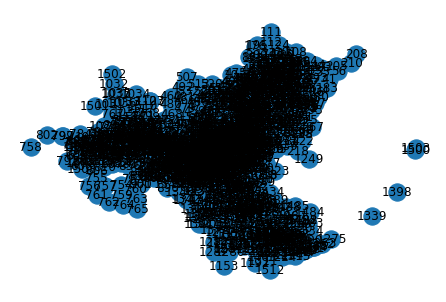

In [129]:
nx_G = G.to_networkx()
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G,pos,with_labels = True)
#plt.figure(figsize=(20,20))

#plt.show()